In [1]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import time
from BacktestBaseFunc import StockInterDay

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


# EMA

In [5]:
dt = datetime.today()
bt_period=5
ticker = '8440'
df = StockInterDay(dt+timedelta(-365*bt_period), dt, ticker)
# 

In [10]:
df['EMA'] = df['Close'].ewm(span=240).mean()

In [124]:
days = 240
smoothing = 1.995
factor = smoothing / (1 + days)
round_f = 6
ema = [round(df.Close.head(days).mean(),round_f)]
for i in range(df.shape[0]):
    if i < 5:continue
    tmp_ema = round(df.Close.iloc[i] * factor + ema[-1] * (1 - factor), round_f)
    ema.append(tmp_ema)

In [123]:
ema[-5:]

[44.715921, 44.864943, 44.996157, 45.129598, 45.31248]

In [11]:
df.tail(20)

,_id,Date,Ticker,Open,High,Low,Close,Volume,Adj Close,EMA10,EMA
1019,629862ef63f3423a1ca4024d,2022-06-02,8440,65.8,66.3,64.9,65.0,1521000.0,65.0,67.572031,42.087692
1020,629e08f59803d51192651c91,2022-06-06,8440,64.4,64.7,63.3,63.4,1340000.0,63.4,66.813480,42.264593
1021,629efa3eb67056dbbe147e91,2022-06-07,8440,63.5,65.0,63.5,64.0,1607000.0,64.0,66.301938,42.445006
1022,62a04bf8c1b77e2ea15accd1,2022-06-08,8440,64.8,65.5,64.0,64.1,1022000.0,64.1,65.901586,42.624751
1023,62a19d5a342c9567c88927fa,2022-06-09,8440,65.6,70.5,65.2,70.5,7813000.0,70.5,66.737661,42.856127
1024,62a2ef22cf7ce60fb37874d6,2022-06-10,8440,75.0,76.2,72.6,72.7,24740000.0,72.7,67.821723,43.103842
1025,62a6e3611475e23d7004e9d2,2022-06-13,8440,69.1,70.2,65.9,65.9,3966000.0,65.9,67.472319,43.293058
1026,62a834e2921a0494a4bb03fc,2022-06-14,8440,67.7,70.5,66.7,68.8,9008000.0,68.8,67.713715,43.504775
1027,62a98675cc8070f88295441e,2022-06-15,8440,67.5,68.8,67.0,67.8,3078000.0,67.8,67.729403,43.706433
1028,62aad81745c40880c2d2b7ee,2022-06-16,8440,68.0,69.4,63.6,63.6,2836000.0,63.6,66.978603,43.871556


# KD

In [2]:
dt = datetime.today()
bt_period=5
ticker = '6470'
df = StockInterDay(dt+timedelta(-365*bt_period), dt, ticker)
# 

In [19]:
num_day = 9
factor = 3

df['rollingL'] = df['Low'].rolling(num_day).min()
df['rollingH'] = df['High'].rolling(num_day).max()
df['RSV'] = (df['Close'] - df['rollingL']) / (df['rollingH'] - df['rollingL']) * 100

df['K'] = df['D'] = 50
for i in range(df.shape[0]):
    if i >= 9:
        df.loc[i, 'K'] = df.loc[i-1,'K'] * (factor - 1) / factor + df.loc[i,'RSV'] * (1 / factor)
        df.loc[i, 'D'] = df.loc[i-1,'D'] * (factor - 1) / factor + df.loc[i,'K'] * (1 / factor)
# df['K'] = df['K'].shift(1) * (factor - 1) / factor + df['RSV'] * (1 / factor)
# df['D'] = df['D'].shift(1) * (factor - 1) / factor + df['RSV'] * (1 / factor)

In [21]:
df['K,D'.split(',')]#.plot(figsize=(16,8))

,K,D
0,50.000000,50.000000
1,50.000000,50.000000
2,50.000000,50.000000
3,50.000000,50.000000
4,50.000000,50.000000
...,...,...
1217,15.892627,26.016983
1218,10.595084,20.876350
1219,16.258792,19.337164
1220,33.555244,24.076524


<AxesSubplot:>

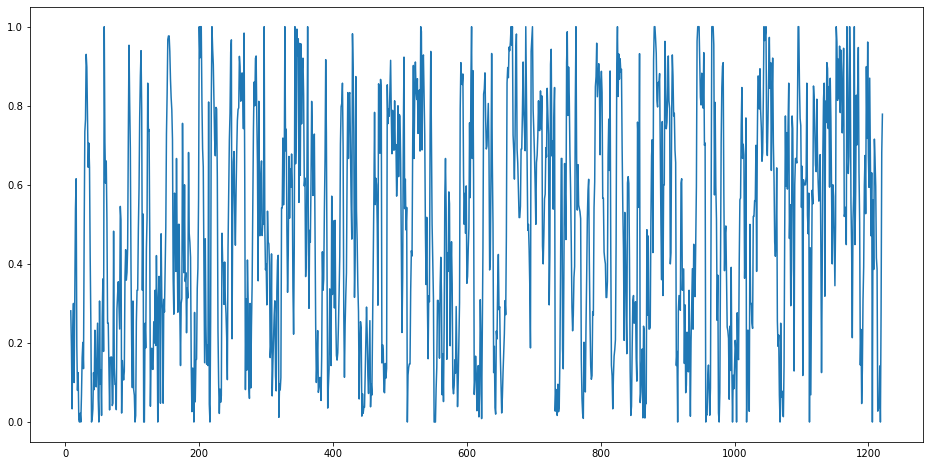

In [18]:
df['RSV'].plot(figsize=(16,8))